# 과제

## **과제 (100점)**

본인이 관심 있는 그룹에 대해서 해당 크롤링을 반복해서 수행하시오. 데이터를 수집하여 excel파일로 저장하시오.



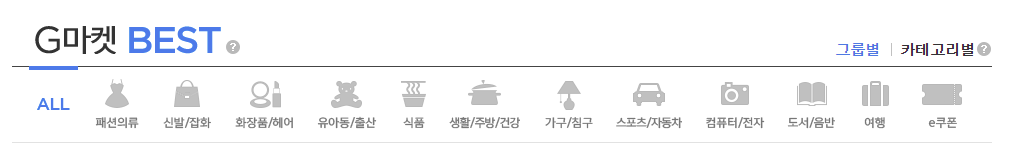

아래에 코드 입력

In [1]:
#1. 필요한 라이브러리 import 하기 (10점)
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

In [2]:
#2. 링크를 request.get으로 가져오기 (header가 필요한 경우 headers 입력) (10점)
res = requests.get("https://www.gmarket.co.kr/n/best?viewType=G&groupCode=G07")

#3. BeautifulSoup을 이용해 파싱하기 (10점)
soup = BeautifulSoup(res.content, 'html.parser')

In [ ]:
soup

In [4]:
#4. 상품명 크롤링하여 리스트로 저장하기 (20점)
item_list = soup.select('a.itemname')

title_list = [] #빈 리스트 생성
for item in item_list:
    title_list.append(item.get_text())
# title_list

In [5]:
#5. 정가 정보 크롤링하여 리스트로 저장하기 (10점)
item_list = soup.select('div.o-price')

org_price_list = [] #빈 리스트 생성
for item in item_list:
    org_price_list.append(item.get_text())
# org_price_list

In [6]:
#6. 할인가 정보 크롤링하여 리스트로 저장하기 (10점)
item_list = soup.select('div.s-price')

sale_price_list = [] #빈 리스트 생성
for item in item_list:
    sale_price_list.append(item.get_text())
# sale_price_list 

In [7]:
def extract_number(x):
    price = re.findall("\d.*원", x)
    
    try:
        price_num = price[0].replace('원', '') # 문자열 내의 원을 없앤다
        
        try:
            price_num = int(price_num.replace(',', '')) # 쉼표가 있으면 없애고 정수로 변환
        except:
            price_num = int(price_num) # 쉼표가 없으면 그냥 정수로만 변환
    except:
        pass
    
    return price_num if price else None # price가 빈 리스트가 아닐 때에는 price_num을 반환하고 아니면 None을 반환

In [8]:
def fill_na_with_sales(row):
    if pd.isna(row['정가']):
        return row['판매가']
    else:
        return row['정가']

In [9]:
#7. 적절히 데이터 전처리를 하여 DataFrame 객체로 만들고 Excel 파일로 저장하기 (30점)
#이때, DataFrame의 열은 "상품명, 정가, 판매가"로 구성되어야 함.

total = pd.DataFrame([title_list, org_price_list, sale_price_list]).T
total.columns = ['상품명', '정가', '판매가']

#위에서 정의한 함수를 활용하여 정가와 판매가에서 숫자만 추출해낸다
total['정가'] = total['정가'].apply(extract_number)        
total['판매가'] = total['판매가'].apply(extract_number)

total['정가'] = total.apply(fill_na_with_sales, axis=1)     #total의 정가 중 비어있는 값에 대한 처리를 해주고
total['정가'] = total['정가'].apply(int)                    #float형인 정가의 데이터를 int형으로 변환

In [10]:
total.to_excel('gmarket_best_food.xlsx') #데이터프레임 total의 데이터를 엑셀 파일로 저장하기